#### Auteur = @Younes_Chouiyakhe
## Importation des bibliothèques


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, GaussianNoise
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
import numpy as np
import matplotlib.pyplot as plt



## 1) Récupérez le dataset MNIST et séparez le en train / test


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


## 2) Créez un simple autoencoder convolutifs (CAE) ainsi qu’un CNN
### Création d'Autoencoder

In [3]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

### Fit Autoencoder


In [4]:
autoencoder.fit(x_train, x_train, 
          epochs=30,
          batch_size=256,
          shuffle=True,
         validation_data=(x_test, x_test))


Epoch 1/30
235/235 [==============================] - 74s 314ms/step - loss: 0.3504 - val_loss: 0.1594
Epoch 2/30
235/235 [==============================] - 124s 528ms/step - loss: 0.1528 - val_loss: 0.1363
Epoch 3/30
235/235 [==============================] - 137s 585ms/step - loss: 0.1344 - val_loss: 0.1251
Epoch 4/30
235/235 [==============================] - 144s 615ms/step - loss: 0.1244 - val_loss: 0.1188
Epoch 5/30
235/235 [==============================] - 161s 686ms/step - loss: 0.1190 - val_loss: 0.1148
Epoch 6/30
235/235 [==============================] - 163s 692ms/step - loss: 0.1150 - val_loss: 0.1119
Epoch 7/30
235/235 [==============================] - 158s 673ms/step - loss: 0.1127 - val_loss: 0.1097
Epoch 8/30
235/235 [==============================] - 154s 658ms/step - loss: 0.1102 - val_loss: 0.1078
Epoch 9/30
235/235 [==============================] - 124s 527ms/step - loss: 0.1084 - val_loss: 0.1063
Epoch 10/30
235/235 [==============================] - 126s 535ms

#### La rangée du haut correspond aux chiffres d'origine et la rangée du bas aux chiffres reconstruits avec Autoencoder.
##### Comme illustrer dans la figure avec Autoencoder on perd pas mal d'informations.

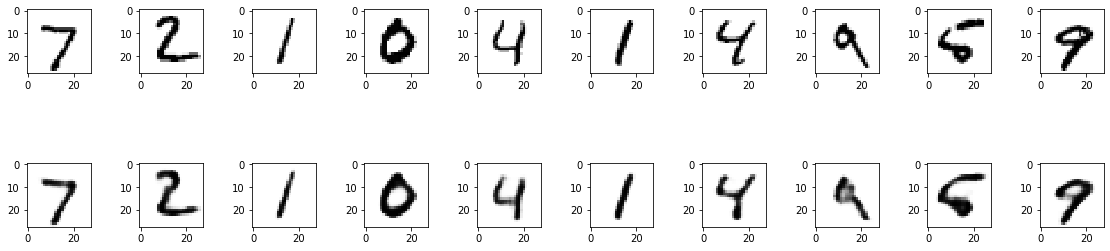

In [5]:
auto_enco_images = autoencoder.predict(x_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(auto_enco_images[i].reshape(28, 28), cmap="binary")

plt.show()

### Création de CNN

In [6]:
CNN = Sequential()
CNN.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D((2, 2), padding='same'))
CNN.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
CNN.add(MaxPooling2D((2, 2), padding='same'))
CNN.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

CNN.add(MaxPooling2D((2, 2), padding='same'))
CNN.add(Flatten())
CNN.add(Dense(10, activation="softmax"))


In [7]:
CNN.summary()
CNN.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

### Fit CNN

In [8]:
CNN.fit(x_train, y_train, 
        epochs=10,
        batch_size=256,
         validation_data=(x_test, y_test)
       )

Epoch 1/10
235/235 [==============================] - 42s 174ms/step - loss: 1.3961 - accuracy: 0.5644 - val_loss: 0.2133 - val_accuracy: 0.9343
Epoch 2/10
235/235 [==============================] - 57s 243ms/step - loss: 0.2095 - accuracy: 0.9351 - val_loss: 0.1378 - val_accuracy: 0.9571
Epoch 3/10
235/235 [==============================] - 59s 253ms/step - loss: 0.1388 - accuracy: 0.9586 - val_loss: 0.1014 - val_accuracy: 0.9686
Epoch 4/10
235/235 [==============================] - 58s 245ms/step - loss: 0.1083 - accuracy: 0.9660 - val_loss: 0.0920 - val_accuracy: 0.9719
Epoch 5/10
235/235 [==============================] - 58s 247ms/step - loss: 0.0915 - accuracy: 0.9717 - val_loss: 0.0827 - val_accuracy: 0.9749
Epoch 6/10
235/235 [==============================] - 58s 246ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 7/10
235/235 [==============================] - 59s 250ms/step - loss: 0.0769 - accuracy: 0.9765 - val_loss: 0.0679 - val_ac

In [9]:
test_loss, test_acc = CNN.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

313/313 [==============================] - 6s 18ms/step - loss: 0.0613 - accuracy: 0.9805
Test Loss: 0.061272453516721725 - Test Acc: 0.9804999828338623


## 4) Récupérer l'embedding intermédiaire du CAE sur le jeu de test, y appliquer du bruit pour reconstruire l'input

In [10]:
encoder = Model(input_img, encoded)
#encoder.layers
encoded_input = Input(shape=(4, 4, 8))
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(encoded_input, decoded)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 4, 8)]         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        2336      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 28, 28, 32)        0   

#####  Récupération après on ajoute un bruit

In [11]:
####### encoder = les résultats intermédiaire du CAE
encoder_img = encoder.predict(x_test)
##### Ajout du bruit
noise_factor = 0.5

encoder_noise = encoder_img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=encoder_img.shape) 

encoder_img = np.clip(encoder_img, 0., 1.)
##### images bruitées
img_decoder = decoder.predict(encoder_img)

####  Fonction qui génère une image bruitée par ce mécanisme (prend une image en entrée et renvoie une image générée avec du bruit sur l’embedding intermédiaire)


In [12]:
def add_noise(img):
    
    noise_factor = 0.5
    img = encoder.predict(img)
    img_noisy = img + noise_factor * np.random.normal(loc=0.1, scale=1.0, size=img.shape) 

    img_noisy = np.clip(img_noisy, 0., 1.)
    return img_noisy

### Exemple

#### En haut exemple d'une image du codeur et en bat l'image après le bruit


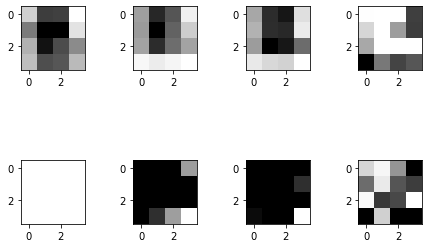

In [13]:
img = encoder.predict(np.expand_dims(x_test[1,:,:,:], axis=0))
img_noise = add_noise(np.expand_dims(x_test[1,:,:,:], axis=0))
plt.figure(figsize=(40, 4))
for i in range(4):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(img[0,:,:,i].reshape(4, 4), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40+i+ 1)
    plt.imshow(img_noise[0,:,:,i].reshape(4, 4), cmap="binary")
plt.show()


#### Reconstruction de l'input après l'ajout du bruit sur l'embedding intermédiaire du CAE sur le jeu de test

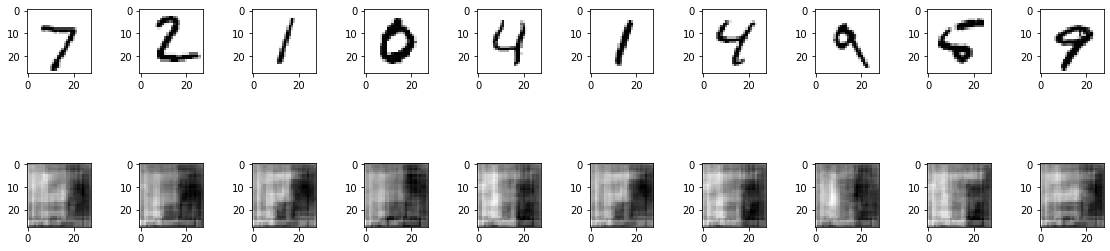

In [14]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(img_decoder[i].reshape(28, 28), cmap="binary")

plt.show()

###### Conclusion de la question 4: 

###### On constate que lorsqu'on ajoute du bruit sur l'embedding intermédiairedu CAE et on reconstruit l'input, on trouve des résultats médiocres et c'est normal vu que le bruit ajouté est sur des images qui sont très petites de (4,4), c'est comme si on débruite les images de l'embedding  intermédiaire du CAE et non pas les images d'entrées.

##  5) Tester pour chaque images avec 10 perturbations dans l’embedding intermédiaire (mettre une perturbation de l'ordre de 10%) et affichez les images originelles avec la plus grande variation

#### Appliquer l'autoencodeur convolutif précédent.
#### Entraîner l'auto-encodeur à mapper des images de chiffres bruitées pour nettoyer les images de chiffres.

In [15]:
#adding some noise
def add_noise_5(img):
    
    noise_factor = 0.5
    img_noisy = img + noise_factor * np.random.normal(loc=0.1, scale=1.0, size=img.shape) 

    img_noisy = np.clip(img_noisy, 0., 1.)
    return img_noisy

##### Récupérer l'embedding intermédiaire du CAE sur le jeu de test, y appliquer du bruit pour reconstruire l'input


In [16]:
x_test_noisy = np.array(list(map(add_noise_5, auto_enco_images)))
x_train_noisy = np.array(list(map(add_noise_5, x_train)))


x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

##### Affichage de quelques images bruitées


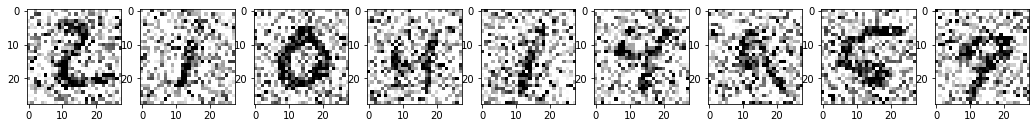

In [17]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


In [18]:
Autoencoder = Sequential()
Autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
Autoencoder.add(MaxPooling2D((2, 2), padding='same'))
Autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
Autoencoder.add(MaxPooling2D((2, 2), padding='same'))
Autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

Autoencoder.add(MaxPooling2D((2, 2), padding='same'))
 
Autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
Autoencoder.add(UpSampling2D((2, 2)))
Autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
Autoencoder.add(UpSampling2D((2, 2)))
Autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
Autoencoder.add(UpSampling2D((2, 2)))
Autoencoder.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Autoencoder.summary()
Autoencoder.fit(x_train_noisy, x_train,
          epochs=30,
          batch_size=256, 
          shuffle=True, 
          validation_data=(x_test_noisy, auto_enco_images))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 8)          

#### En haut, les images bruitées, et en bas, les images reconstruits par le réseau après l'enlèvement du bruit .
#### D'après les images on constate que l'auto-encodeur marche très bien

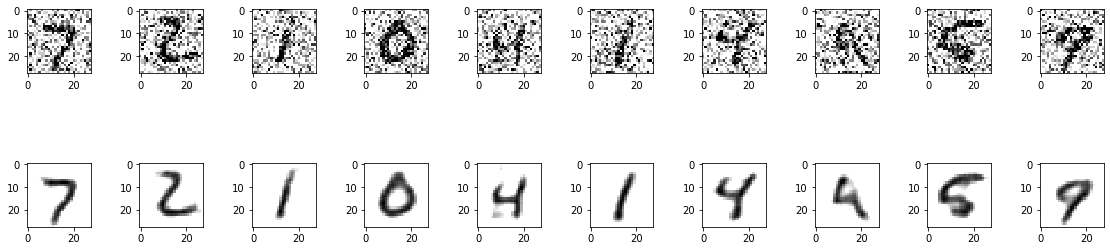

In [19]:
no_noise_img = Autoencoder.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

### Conclusion:
###### On déduit que lorsqu'on entre les images bruitées à l'autoencoder pour s'entrainer, on trouve de bonne résultats comme illustrer dans la figure au-dessus contrairement à la  question précédente.